# Анализ рейтинга шахматистов ФИДЕ (Март 2022)

## Парсинг их неудобного формата хранения

In [ ]:
columns = ['ID Number', 'Name', 'Fed', 'Sex', 'Tit', 'WTit', 'OTit', 'FOA', 'MAR22', 'Gms', 'K', 'B-day', 'Flag']
numeric_columns = ['ID Number', 'MAR22', 'Gms', 'K', 'B-day']

In [ ]:
with open('standard_rating_list.txt') as f:
  header = next(f)
  entries = []

  data = []

  for column in columns:
    entries.append(header.find(column))
  
  for line in f:
    new_elem = {}
    
    for i in range(len(columns) - 1):
      new_elem[columns[i]] = line[entries[i]:entries[i + 1]].strip()
    
    new_elem[columns[-1]] = line[entries[-1]:].strip()

    for key in new_elem:
      if key in numeric_columns:
        new_elem[key] = int(new_elem[key])
    
    data.append(new_elem)

In [ ]:
len(data)

380786

In [ ]:
data[0]

{'B-day': 1987,
 'FOA': '',
 'Fed': 'IND',
 'Flag': 'i',
 'Gms': 0,
 'ID Number': 25121731,
 'K': 40,
 'MAR22': 1063,
 'Name': 'A C J John',
 'OTit': '',
 'Sex': 'M',
 'Tit': '',
 'WTit': ''}

In [ ]:
import pandas as pd

df = pd.DataFrame(data, columns=columns)

## Анализ данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.float_format',  '{:,.2f}'.format)
plt.rcParams['figure.figsize'] = 12, 8
plt.rcParams.update({'font.size': 14})

In [ ]:
df

,ID Number,Name,Fed,Sex,Tit,WTit,OTit,FOA,MAR22,Gms,K,B-day,Flag
0,25121731,A C J John,IND,M,,,,,1063,0,40,1987,i
1,35077023,A Chakravarthy,IND,M,,,,,1151,0,40,1986,i
2,10207538,"A E M, Doshtagir",BAN,M,,,,,1840,0,40,1974,i
3,10680810,"A hamed Ashraf, Abdallah",EGY,M,,,,,1728,0,40,2001,i
4,5716365,"A Hamid, Harman",MAS,M,,,,,1325,0,40,1970,i
...,...,...,...,...,...,...,...,...,...,...,...,...,...
380781,21836060,"Zyto, Karol",POL,M,,,,,1458,0,40,2006,
380782,34190632,"Zyubin, Sergey",RUS,M,,,,,1884,0,40,1975,i
380783,24232602,"Zyuzev, Pavel",RUS,M,,,,,1856,0,40,1993,i
380784,1189980,"Zywert, Kacper",POL,M,,,,,1519,0,20,1999,


In [ ]:
# Основные характеристики распределения рейтинга
df['MAR22'].describe()

count   380,786.00
mean      1,645.09
std         348.75
min       1,001.00
25%       1,362.00
50%       1,647.00
75%       1,914.00
max       2,864.00
Name: MAR22, dtype: float64

In [ ]:
# Основные характеристики распределения рейтинга у мужчин
df[df['Sex'] == 'M']['MAR22'].describe()

count   340,297.00
mean      1,662.97
std         345.76
min       1,001.00
25%       1,389.00
50%       1,669.00
75%       1,928.00
max       2,864.00
Name: MAR22, dtype: float64

In [ ]:
# Основные характеристики распределения рейтинга у женщин
df[df['Sex'] == 'F']['MAR22'].describe()

count   40,489.00
mean     1,494.83
std        337.36
min      1,001.00
25%      1,206.00
50%      1,441.00
75%      1,747.00
max      2,675.00
Name: MAR22, dtype: float64

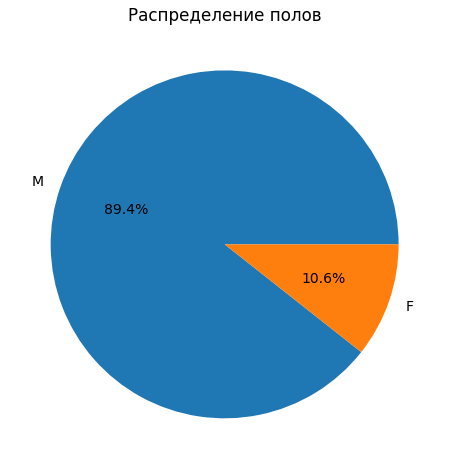

In [ ]:
sex = df['Sex'].value_counts()
plt.pie(sex.values, labels=sex.index, autopct='%1.1f%%')
plt.title('Распределение полов')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


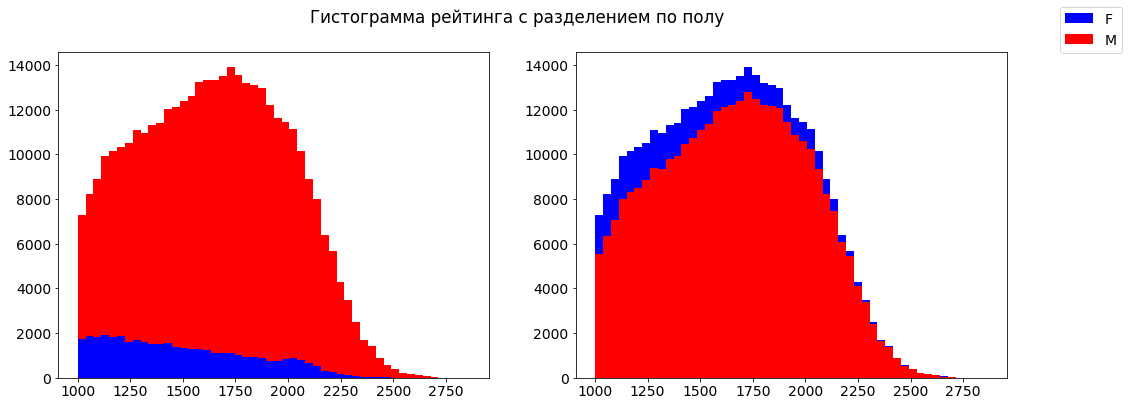

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(17, 6))
fig.suptitle('Гистограмма рейтинга с разделением по полу')

ax[0].hist([df[df['Sex'] == 'F']['MAR22'], df[df['Sex'] == 'M']['MAR22']], bins = 50, stacked=True,
         color = ['blue', 'red'], label=['F', 'M'])

ax[1].hist([df[df['Sex'] == 'M']['MAR22'], df[df['Sex'] == 'F']['MAR22']], bins = 50, stacked=True,
         color = ['red', 'blue'])

fig.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


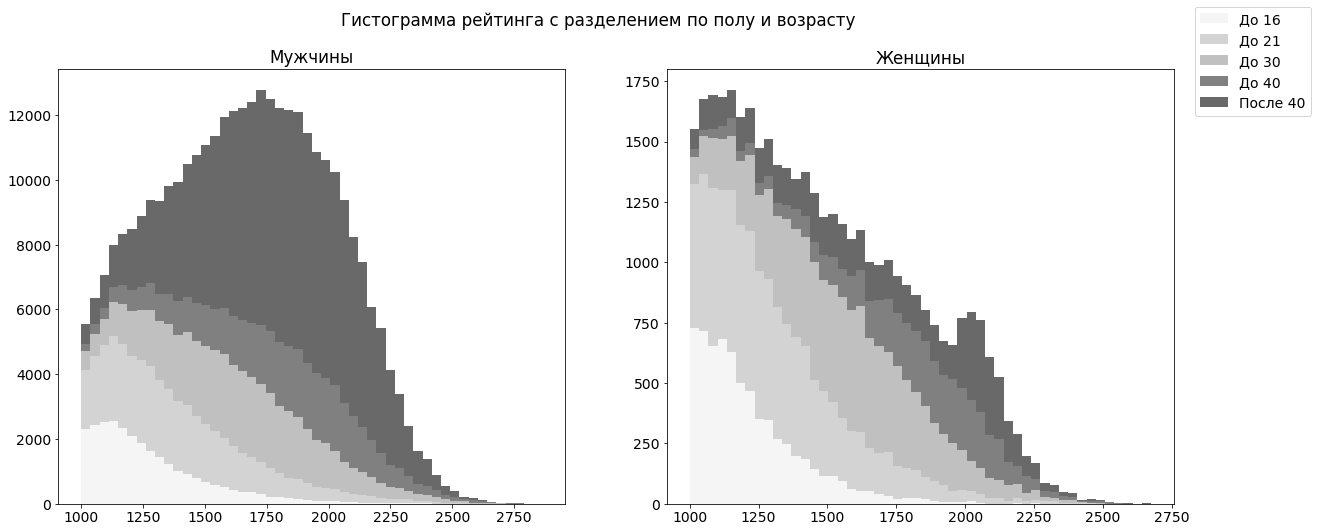

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Гистограмма рейтинга с разделением по полу и возрасту')

df['age'] = 2022 - df['B-day']
groups = [df[df['age'] < 16],
          df[(df['age'] >= 16) & (df['age'] < 21)],
          df[(df['age'] >= 21) & (df['age'] < 30)],
          df[(df['age'] >= 30) & (df['age'] < 40)],
          df[df['age'] >= 40]
]
group_names = ['До 16', 'До 21', 'До 30', 'До 40', 'После 40']
group_colors = ['whitesmoke', 'lightgray', 'silver', 'gray', 'dimgray']

ax[0].title.set_text('Мужчины')
ax[0].hist(list(map(lambda x: x[x['Sex'] == 'M']['MAR22'], groups)), bins = 50, stacked=True,
         color = group_colors, label=group_names)

ax[1].title.set_text('Женщины')
ax[1].hist(list(map(lambda x: x[x['Sex'] == 'F']['MAR22'], groups)), bins = 50, stacked=True,
         color = group_colors)

fig.legend()
plt.show()

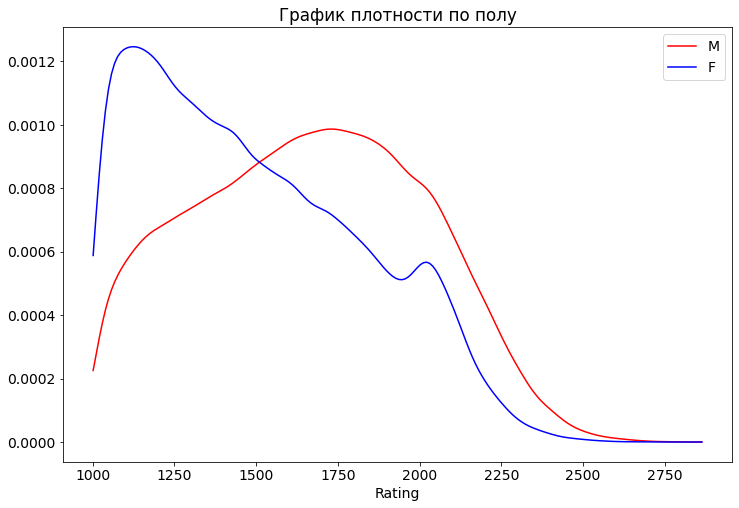

In [ ]:
from scipy.stats import gaussian_kde

def get_density(X, targett, smooth=0.1):
  density = gaussian_kde(targett)

  density.covariance_factor = lambda : smooth
  density._compute_covariance()
  return density(X)

x_vals = np.linspace(df['MAR22'].min(), df['MAR22'].max(), 200)
y_male = get_density(x_vals, df[df['Sex'] == 'M']['MAR22'])
y_fema = get_density(x_vals, df[df['Sex'] == 'F']['MAR22'])

plt.plot(x_vals, y_male, c='red', label='M')
plt.plot(x_vals, y_fema, c='blue', label='F')
plt.title('График плотности по полу')
plt.xlabel('Rating')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


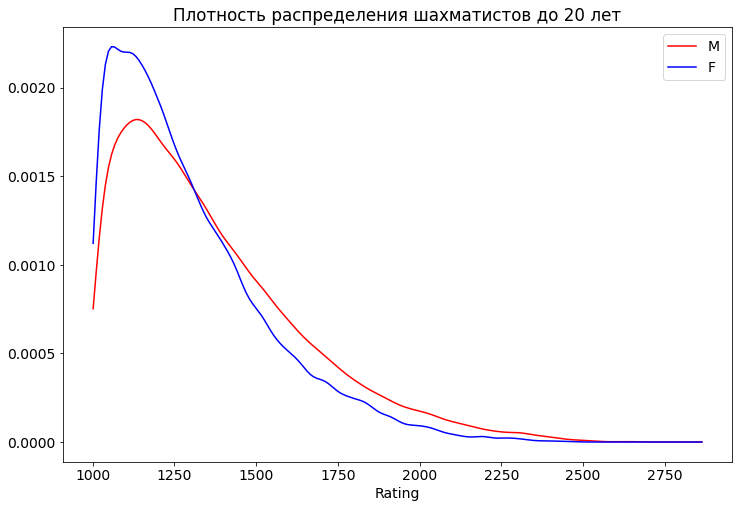

In [ ]:
x_vals = np.linspace(df['MAR22'].min(), df['MAR22'].max(), 200)
y_male = get_density(x_vals, df[df['Sex'] == 'M'][df['age'] < 21]['MAR22'])
y_fema = get_density(x_vals, df[df['Sex'] == 'F'][df['age'] < 21]['MAR22'])

plt.plot(x_vals, y_male, c='red', label='M')
plt.plot(x_vals, y_fema, c='blue', label='F')
plt.title('Плотность распределения шахматистов до 20 лет')
plt.xlabel('Rating')
plt.legend()
plt.show()